In [37]:
import pandas as pd
df = pd.read_csv('../Downloads/microdados_enem_2020/DADOS/MICRODADOS_ENEM_2020.csv', encoding='latin1', sep=';', nrows=500000)
df.head

<bound method NDFrame.head of         NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0       200006271946    2020               11       F                1   
1       200001195856    2020               11       M                2   
2       200001943954    2020                4       F                2   
3       200001908998    2020                2       M                1   
4       200001634757    2020                4       F                1   
...              ...     ...              ...     ...              ...   
499995  200004258287    2020                2       F                1   
499996  200005431672    2020               11       F                1   
499997  200001990914    2020                2       M                1   
499998  200005626167    2020               11       F                1   
499999  200002236054    2020               11       M                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0     

In [109]:
def alter_estado_civil(value):
    dict_states = ['Nao Informado', 'Solteiro', 'Casado', 'Divorciado', 'Viuvo']
    return dict_states[value]
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].map(lambda x : alter_estado_civil(x))
df['TP_ESTADO_CIVIL'].unique()

array(['Solteiro', 'Nao Informado', 'Casado', 'Divorciado', 'Viuvo'],
      dtype=object)

In [84]:
def alter_cor_raca(value):
    map_object = ['Nao Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena']
    return map_object[value]
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(lambda x: alter_cor_raca(x))
df['TP_COR_RACA']

36         Parda
65         Parda
84         Parda
89        Branca
93         Preta
           ...  
499983     Parda
499987    Branca
499991    Branca
499993    Branca
499997    Branca
Name: TP_COR_RACA, Length: 80745, dtype: object

In [15]:
def alter_nacionalidade(value):
    map_objects = ['Nao informado', 'Brasileiro', 'Brasileiro Naturalizado', 'Estrangeiro', 'Brasileiro nascido no exterior']
    if value != None:
        return map_objects[value]
    else:
        return 'Nao informado'

df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].map(lambda x: alter_nacionalidade(x))
df['TP_NACIONALIDADE']

0                      Brasileiro
1                      Brasileiro
2         Brasileiro Naturalizado
3                      Brasileiro
4         Brasileiro Naturalizado
                   ...           
499995                 Brasileiro
499996                 Brasileiro
499997                 Brasileiro
499998                 Brasileiro
499999                 Brasileiro
Name: TP_NACIONALIDADE, Length: 500000, dtype: object

In [16]:
def alter_st_conclusao(value):
    map_objects = ['Ensino medio completo', 'Ensino medio completo em 2020', 'Ensino Medio Incompleto apos 2020', 'Sem ensino medio']
    return map_objects[value - 1]
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map(lambda x : alter_st_conclusao(x))
df['TP_ST_CONCLUSAO']

0                 Ensino medio completo
1                 Ensino medio completo
2         Ensino medio completo em 2020
3         Ensino medio completo em 2020
4                 Ensino medio completo
                      ...              
499995    Ensino medio completo em 2020
499996            Ensino medio completo
499997    Ensino medio completo em 2020
499998            Ensino medio completo
499999            Ensino medio completo
Name: TP_ST_CONCLUSAO, Length: 500000, dtype: object

In [18]:
map_tp_ano_concluiu = ['Nao Informado', 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 'Antes de 2007']
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].map(lambda x: map_tp_ano_concluiu[x])
df['TP_ANO_CONCLUIU']

0                  2009
1                  2009
2         Nao Informado
3         Nao Informado
4                  2019
              ...      
499995    Nao Informado
499996             2011
499997    Nao Informado
499998             2008
499999    Nao Informado
Name: TP_ANO_CONCLUIU, Length: 500000, dtype: object

In [104]:
map_tp_escola = ['', 'Nao Respondeu', 'Publica', 'Privada', 'Exterior']
df['TP_ESCOLA'] = df['TP_ESCOLA'].map(lambda x: map_tp_escola[x])
df['TP_ESCOLA']

36        Publica
65        Publica
84        Publica
89        Publica
93        Publica
           ...   
499983    Publica
499987    Publica
499991    Publica
499993    Publica
499997    Privada
Name: TP_ESCOLA, Length: 80745, dtype: object

In [45]:
map_tp_ensino = ['', 'Regular', 'Especial', 'EJA']
df = df.dropna()
df['TP_ENSINO'] = df['TP_ENSINO'].astype(int)
df['TP_ENSINO'].unique()
df['TP_ENSINO'] = df['TP_ENSINO'].map(lambda x: map_tp_ensino[x])

/tmp/ipykernel_35179/591481954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_ENSINO'] = df['TP_ENSINO'].astype(int)
/tmp/ipykernel_35179/591481954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_ENSINO'] = df['TP_ENSINO'].map(lambda x: map_tp_ensino[x])


In [39]:
df['TP_ENSINO'].unique()

array([nan,  1.,  2.])

In [41]:
map_in_treineiro = [False, True]
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].map(lambda x : map_in_treineiro[x])
df['IN_TREINEIRO']

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Name: IN_TREINEIRO, Length: 500000, dtype: bool

In [42]:
df['IN_TREINEIRO'].unique()

array([False,  True])

In [48]:
map_tp_dependencia_esc = ['', 'Federal', 'Estadual', 'Municipal','Privada']
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].astype(int)
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].map(lambda x : map_tp_dependencia_esc[x])
df['TP_DEPENDENCIA_ADM_ESC'].unique()

/tmp/ipykernel_35179/794729705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].astype(int)
/tmp/ipykernel_35179/794729705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].map(lambda x : map_tp_dependencia_esc[x])


array(['Estadual', 'Federal', 'Privada', 'Municipal'], dtype=object)

In [50]:
map_localizacao_esc = ['', 'Urbana', 'Rural']
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].astype(int)
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].map(lambda x : map_localizacao_esc[x])
df['TP_LOCALIZACAO_ESC'].unique()

/tmp/ipykernel_35179/2243934999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].astype(int)
/tmp/ipykernel_35179/2243934999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].map(lambda x : map_localizacao_esc[x])


array(['Urbana', 'Rural'], dtype=object)

In [52]:
map_func_esc = ['', 'Em Atividade', 'Paralisada', 'Extinta', 'Extinta']
df['TP_SIT_FUNC_ESC'].unique()
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].astype(int)
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].map(lambda x : map_func_esc[x])
df['TP_SIT_FUNC_ESC'].unique()

/tmp/ipykernel_35179/195022291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].astype(int)
/tmp/ipykernel_35179/195022291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].map(lambda x : map_func_esc[x])


array(['Em Atividade', 'Extinta', 'Paralisada'], dtype=object)

In [54]:
map_presenca = ['Faltou', 'Presente', 'Eliminado']
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].map(lambda x: map_presenca[x])
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].map(lambda x: map_presenca[x])
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].map(lambda x: map_presenca[x])
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].map(lambda x: map_presenca[x])
df['TP_PRESENCA_MT'].unique()

/tmp/ipykernel_35179/1975983007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].map(lambda x: map_presenca[x])
/tmp/ipykernel_35179/1975983007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].map(lambda x: map_presenca[x])
/tmp/ipykernel_35179/1975983007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

array(['Presente'], dtype=object)

In [55]:
print(df['TP_PRESENCA_CN'].unique())
print(df['TP_PRESENCA_CH'].unique())
print(df['TP_PRESENCA_LC'].unique())

['Presente']
['Presente']
['Presente']


In [57]:
map_tp_lingua = ['Ingles', 'Espanhol']
df['TP_LINGUA'].unique()
df['TP_LINGUA'] = df.loc[:, 'TP_LINGUA'].map(lambda x: map_tp_lingua[x])
df['TP_LINGUA'].unique()

/tmp/ipykernel_35179/1313003076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_LINGUA'] = df.loc[:, 'TP_LINGUA'].map(lambda x: map_tp_lingua[x])


array(['Espanhol', 'Ingles'], dtype=object)

In [63]:
map_status_redacao = ['', 'Normal', 'Anulada', 'Anulada', 'Anulada', 'Anulada', 'Anulada', 'Anulada', 'Anulada', 'Anulada']
df.loc[:, 'TP_STATUS_REDACAO'] = df.loc[:, 'TP_STATUS_REDACAO'].astype(int)
df['TP_STATUS_REDACAO'] = df.loc[:, 'TP_STATUS_REDACAO'].map(lambda x: map_status_redacao[x])
df['TP_STATUS_REDACAO'].unique()

/tmp/ipykernel_35179/42317584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'TP_STATUS_REDACAO'] = df.loc[:, 'TP_STATUS_REDACAO'].astype(int)
/tmp/ipykernel_35179/42317584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_STATUS_REDACAO'] = df.loc[:, 'TP_STATUS_REDACAO'].map(lambda x: map_status_redacao[x])


array(['Normal', 'Anulada'], dtype=object)

In [64]:
df = df.drop(columns = ['Q003', 'Q004', 'Q018', 'Q020', 'Q017', 'Q023'])

In [65]:
df = df.rename(columns = {'Q001': 'ESCOLARIDADE_PAI', 'QOO2': 'ESCOLARIDADE_MAE', 'Q005': 'QUANTIDADE_MORADORES', 'Q006':'RENDA_FAMILIA', \
                          'Q007': 'EMPREGADOS_DOMESTICOS_FAMILIA', 'Q008': 'BANHEIROS_RESIDENCIA', 'Q009': 'QUARTOS_RESIDENCIA', \
                          'Q010': 'QNTD_CARROS', 'Q011': 'QNTD_MOTOS', 'Q012': 'QNTD_GELADEIRAS', 'Q013':'QNTD_FREEZER', \
                          'Q014': 'QNTD_MAQUINA_LAVAR', 'Q015': 'QNTD_MAQUINA_SECAR', 'Q016': 'QNTD_MICROONDAS', 'Q019': 'QNTD_TELEVISAO', \
                          'Q021': 'TV_ASSINATURA', 'Q022': 'QNTD_CELULAR', 'Q024': 'QNTD_COMPUTADOR', 'Q025': 'ACESSO_INTERNET'})


array(['B', 'C', 'F', 'D', 'A', 'E', 'G', 'H', 'I', 'L', 'N', 'J', 'M',
       'K', 'Q', 'P', 'O'], dtype=object)

In [70]:
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']) / 5
df['NOTA_FINAL']

36        516.56
65        582.88
84        506.38
89        677.50
93        707.24
           ...  
499983    590.64
499987    659.70
499991    513.02
499993    446.12
499997    618.00
Name: NOTA_FINAL, Length: 80745, dtype: float64

<AxesSubplot:xlabel='RENDA_FAMILIA', ylabel='NOTA_FINAL'>

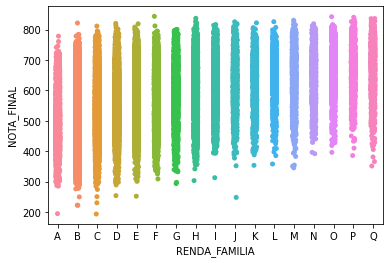

In [78]:
df['RENDA_FAMILIA'].unique()
import seaborn as sns
df2 = df.sort_values(by=['RENDA_FAMILIA'])
sns.stripplot(x='RENDA_FAMILIA', y='NOTA_FINAL', data=df2)

<AxesSubplot:xlabel='TP_FAIXA_ETARIA', ylabel='NOTA_FINAL'>

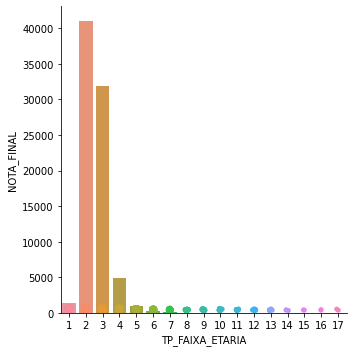

In [81]:
df['TP_FAIXA_ETARIA']
df2 = df.sort_values(by=['TP_FAIXA_ETARIA'])
df2['TP_FAIXA_ETARIA'] = df2['TP_FAIXA_ETARIA'].astype(str)
sns.catplot(x='TP_FAIXA_ETARIA', kind='count', data=df2)

<AxesSubplot:xlabel='TP_FAIXA_ETARIA', ylabel='NOTA_FINAL'>

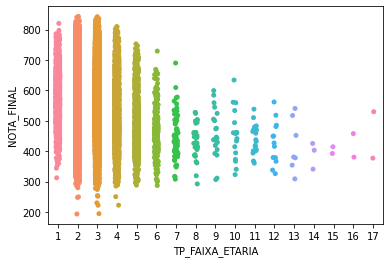

In [82]:
sns.stripplot(x='TP_FAIXA_ETARIA', y='NOTA_FINAL', data=df2)

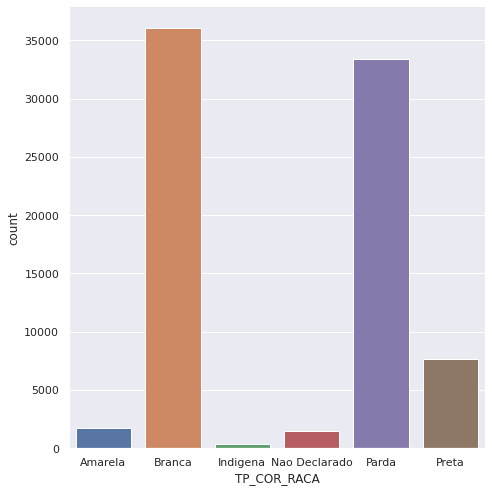

In [99]:
df['TP_COR_RACA']
df2 = df.sort_values(by=['TP_COR_RACA'])
sns.catplot(x='TP_COR_RACA', kind='count', data=df2,height=7)

<AxesSubplot:xlabel='TP_COR_RACA', ylabel='NOTA_FINAL'>

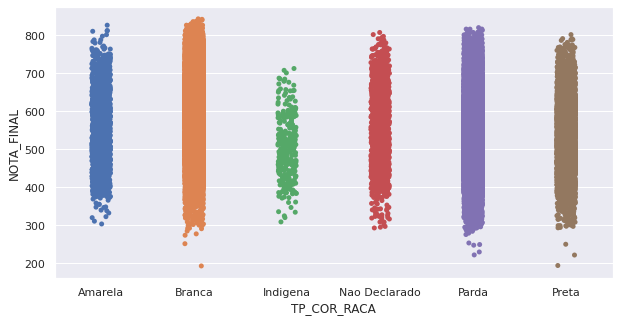

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='TP_COR_RACA', y='NOTA_FINAL', data=df2)

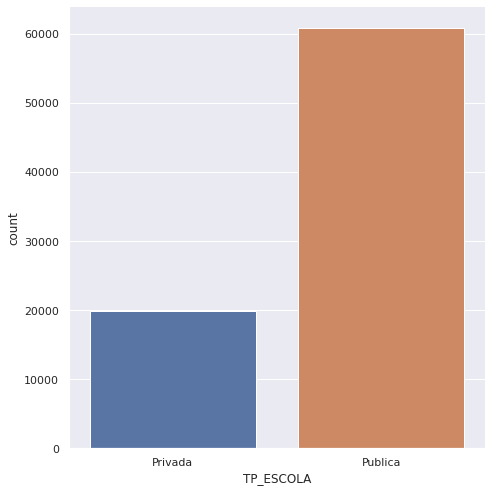

In [105]:
df['TP_ESCOLA']
df2 = df.sort_values(by=['TP_ESCOLA'])
sns.catplot(x='TP_ESCOLA', kind='count', data=df2,height=7)

<AxesSubplot:xlabel='TP_ESCOLA', ylabel='NOTA_FINAL'>

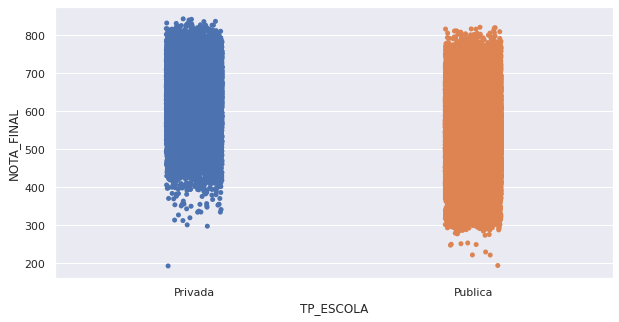

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='TP_ESCOLA', y='NOTA_FINAL', data=df2)

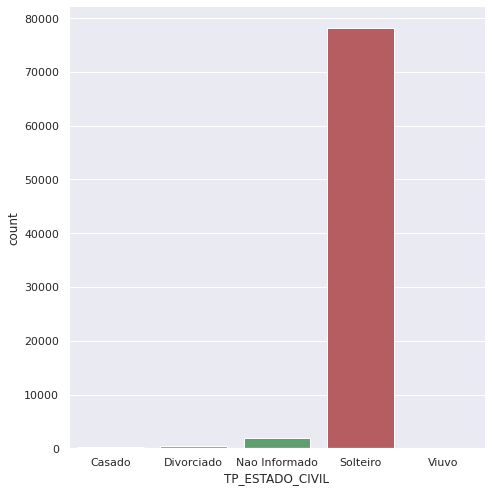

In [110]:
df['TP_ESTADO_CIVIL']
df2 = df.sort_values(by=['TP_ESTADO_CIVIL'])
sns.catplot(x='TP_ESTADO_CIVIL', kind='count', data=df2,height=7)

<AxesSubplot:xlabel='TP_ESTADO_CIVIL', ylabel='NOTA_FINAL'>

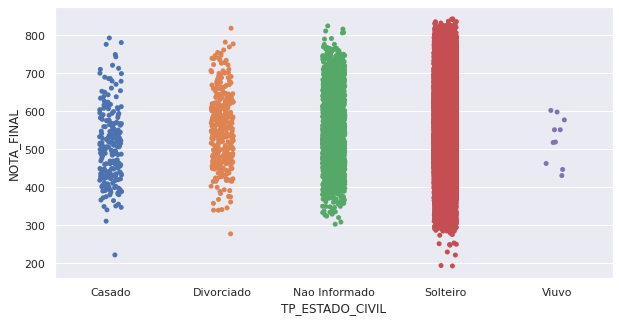

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='TP_ESTADO_CIVIL', y='NOTA_FINAL', data=df2)

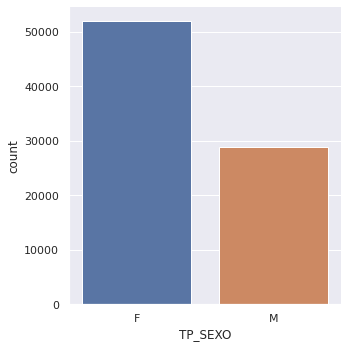

In [113]:
df['TP_SEXO']
df2 = df.sort_values(by=['TP_SEXO'])
sns.catplot(x='TP_SEXO', kind='count', data=df2)

<AxesSubplot:xlabel='TP_SEXO', ylabel='NOTA_FINAL'>

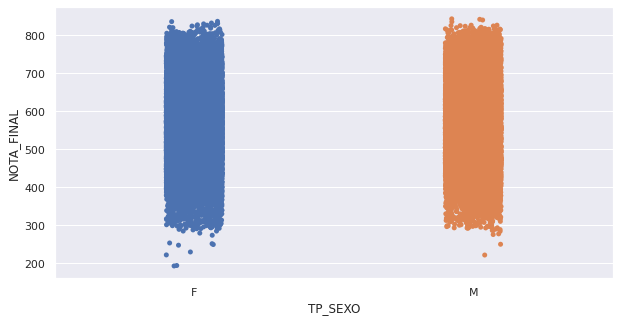

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='TP_SEXO', y='NOTA_FINAL', data=df2)

KeyboardInterrupt: 

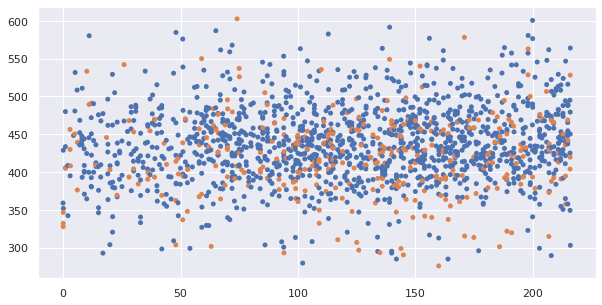

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='NU_NOTA_MT', y='NOTA_FINAL', hue='TP_SEXO', data=df2)

<AxesSubplot:xlabel='ACESSO_INTERNET', ylabel='NOTA_FINAL'>

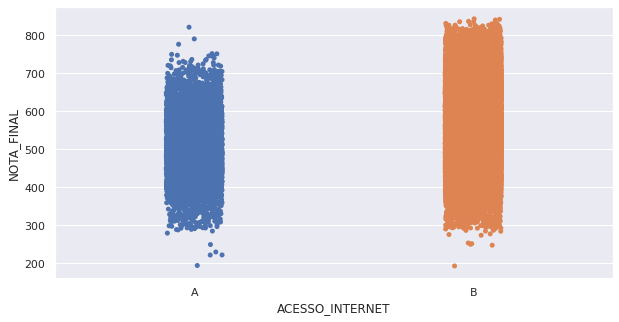

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='ACESSO_INTERNET', y='NOTA_FINAL', data=df2)

<AxesSubplot:xlabel='QNTD_COMPUTADOR', ylabel='NOTA_FINAL'>

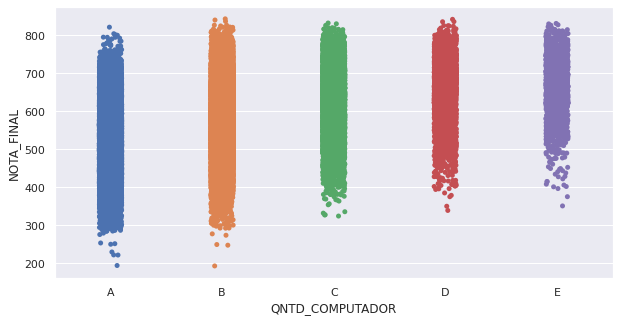

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='QNTD_COMPUTADOR', y='NOTA_FINAL', data=df2)

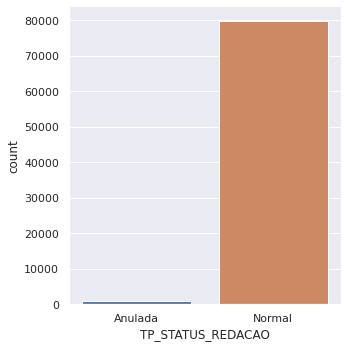

In [125]:
df['TP_STATUS_REDACAO'].unique()
df2 = df.sort_values(by=['TP_STATUS_REDACAO'])
sns.catplot(x='TP_STATUS_REDACAO', kind='count', data=df2)

<AxesSubplot:xlabel='TP_LINGUA', ylabel='NOTA_FINAL'>

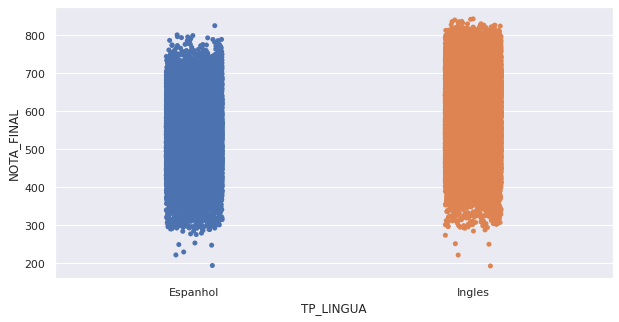

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.stripplot(x='TP_LINGUA', y='NOTA_FINAL', data=df2)

In [15]:
df.columns
# NU_INSCRICAO -> Numero de inscrição do usuario do enem, mudar para string, utilizado para identificação, como um ID único
# NU_ANO -> Ano em que o usuário fez a prova do enem, pegando um unique, o único ano é 2020, portanto pode dropar.
# TP_FAIXA_ETARIA -> Faixa etária do usuário, onde a descrição pode ser encontrada no arquivo de desc das colunas, deixarei da forma que está, pra conseguirmos associar uma sensação de crescimento da idade, trabalhando com faixas etárias
# TP_SEXO -> M ou F, tambem podemos manter assim
# TP_ESTADO_CIVIL -> Aqui, valores inteiros não são necessários, pois não conseguimos fazer uma associação de > ou <, portanto mudei essa coluna para os respectivos valores
# TP_COR_RACA -> Segue a ideia do estado civil
# TP_ NACIONALIDADE -> Segue a ideia do estado civil
# TP_ST_CONCLUSAO -> Segue a ideia do estado civil
# TP_ANO_CONCLUIU -> Segue a ideia da faixa etária
# TP_ESCOLA -> Alterar valores inteiros para as chaves correspondentes
# TP_ENSINO -> Segue o raciocinio do TP_ESCOLA
# IN_TREINEIRO -> Passar para True ou False
# CO_MUNICIPIO_ESC -> Mantem igual
# NO_MUNICIPIO_ESC -> Mantem igual
# CO_UF_ESC -> Mantem igual
# SG_UF_ESC -> Mantem igual
# TP_DEPENDENCIA_ADM_ESC -> Alterar valores inteiros para as chaves correspondentes
# TP_LOCALIZACAO_ESC -> Alterar valores inteiros para as chaves correspondentes
# TP_SIT_FUNC_ESC -> Alterar valores inteiros para as chaves correspondentes
# CO_MUNICIPIO_PROVA -> Mantem igual
# NO_MUNICIPIO_PROVA -> Mantem igual
# CO_UF_PROVA -> Mantem igual
# SG_UF_PROVA -> Mantem igual
# TP_PRESENCA_CN -> Alterar valores inteiros para as chaves correspondentes
# TP_PRESENCA_CH -> Alterar valores inteiros para as chaves correspondentes
# TP_PRESENCA_LC -> Alterar valores inteiros para as chaves correspondentes
# TP_PRESENCA_MT -> Alterar valores inteiros para as chaves correspondentes
# CO_PROVA_CN -> Mantem igual
# CO_PROVA_CH -> Mantem igual
# CO_PROVA_LC -> Mantem igual
# CO_PROVA_MT -> Mantem igual
# NU_NOTA_CN -> Mantem igual
# NU_NOTA_CH -> Mantem igual
# NU_NOTA_LC -> mantem igual
# NU_NOTA_MT -> Mantem igual
# TX_RESPOSTAS_CN -> Mantem igual
# TX_RESPOSTAS_CH -> Mantem igual
# TX_RESPOSTAS_LC -> Mantem igual
# TX_RESPOSTAS_MT -> Mantem igual
# TP_LINGUA -> Alterar valores inteiros para as chaves correspondentes
# TX_GABARITO_CN -> Mantem igual
# TX_GABARITO_CH -> Mantem igual
# TX_GABARITO_LC -> Mantem igual
# TX_GABARITO_MT -> Mantem igual
# TP_STATUS_REDACAO -> Alteramos e trocamos os campos para normal e anulada, e posteriormente, trocamos pra um valor bool.
# NU_NOTA_COMP1 -> Mantem igual
# NU_NOTA_COMP2 -> Mantem igual
# NU_NOTA_COMP3 -> Mantem igual
# NU_NOTA_COMP4 -> Mantem igual
# NU_NOTA_COMP5 -> Mantem igual
# NU_NOTA_REDACAO -> Mantem igual
# Q001
# Q002
# Q003 -> Dropada
# Q004 -> Dropada
# Q005 
# Q006
# Q007
# Q008
# Q009
# Q010
# Q011
# Q012
# Q013
# Q014
# Q015
# Q016
# Q017 -> Dropada
# Q018 -> Dropada
# Q019
# Q020 -> Dropada
# Q021
# Q022
# Q023
# Q024
# Q025

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',